In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import yaml

In [85]:
filename = r'.\data\data_1\data\0000000002.png'
camera_file =  r'.\data\data_1\camera_params.yaml'
with open(camera_file) as file:
    camera_coeffs = yaml.load(file, Loader=yaml.FullLoader)
K = np.array(list(float(i) for i in (camera_coeffs['K']).split())).reshape(3,3)
D = np.array(list(float(i) for i in (camera_coeffs['D']).split()))

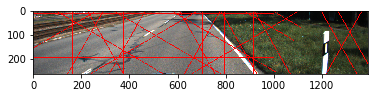

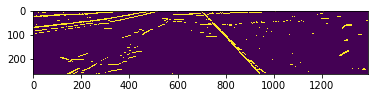

In [164]:
img = cv2.imread(filename)[250:]
undistorted = cv2.undistort(img, K, D)
gauss = cv2.GaussianBlur(undistorted,(7,7),1)
sobel = cv2.Sobel(gauss,-1,0,1)
sobel = cv2.cvtColor(sobel, cv2.COLOR_BGR2GRAY)
sobel = cv2.GaussianBlur(sobel,(7,7),1)
ret, sobel = cv2.threshold(sobel, 50,250, cv2.THRESH_BINARY)
minLineLength = 100
maxLineGap = 1000
lines = cv2.HoughLines(sobel,30,30*np.pi/180,252)
for i in lines:
    for rho,theta in i:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(img[:,:,::-1])
plt.show()
plt.imshow(sobel)
plt.show()